# Generating names with recurrent neural networks

This time you'll find yourself delving into the heart (and other intestines) of recurrent neural networks on a class of toy problems.

Struggle to find a name for the variable? Let's see how you'll come up with a name for your son/daughter. Surely no human has expertize over what is a good child name, so let us train RNN instead;

It's dangerous to go alone, take these:

In [146]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append("..")
import keras_utils
import tqdm_utils

1.2.1


# Load data
The dataset contains ~8k earthling names from different cultures, all in latin transcript.

This notebook has been designed so as to allow you to quickly swap names for something similar: deep learning article titles, IKEA furniture, pokemon names, etc.

In [147]:
start_token = " "  # so that the network knows that we're generating a first token

# this is the token for padding,
# we will add fake pad token at the end of names 
# to make them of equal size for further batching
pad_token = "#"

with open("names") as f:
    names = f.read()[:-1].split('\n')
    names = [start_token + name for name in names]

In [148]:
print('number of samples:', len(names))
for x in names[::]:
    print(x)

number of samples: 7944
 Abagael
 Abagail
 Abbe
 Abbey
 Abbi
 Abbie
 Abby
 Abigael
 Abigail
 Abigale
 Abra
 Acacia
 Ada
 Adah
 Adaline
 Adara
 Addie
 Addis
 Adel
 Adela
 Adelaide
 Adele
 Adelice
 Adelina
 Adelind
 Adeline
 Adella
 Adelle
 Adena
 Adey
 Adi
 Adiana
 Adina
 Adora
 Adore
 Adoree
 Adorne
 Adrea
 Adria
 Adriaens
 Adrian
 Adriana
 Adriane
 Adrianna
 Adrianne
 Adrien
 Adriena
 Adrienne
 Aeriel
 Aeriela
 Aeriell
 Ag
 Agace
 Agata
 Agatha
 Agathe
 Aggi
 Aggie
 Aggy
 Agna
 Agnella
 Agnes
 Agnese
 Agnesse
 Agneta
 Agnola
 Agretha
 Aida
 Aidan
 Aigneis
 Aila
 Aile
 Ailee
 Aileen
 Ailene
 Ailey
 Aili
 Ailina
 Ailyn
 Aime
 Aimee
 Aimil
 Aina
 Aindrea
 Ainslee
 Ainsley
 Ainslie
 Ajay
 Alaine
 Alameda
 Alana
 Alanah
 Alane
 Alanna
 Alayne
 Alberta
 Albertina
 Albertine
 Albina
 Alecia
 Aleda
 Aleece
 Aleecia
 Aleen
 Alejandra
 Alejandrina
 Alena
 Alene
 Alessandra
 Aleta
 Alethea
 Alex
 Alexa
 Alexandra
 Alexandrina
 Alexi
 Alexia
 Alexina
 Alexine
 Alexis
 Alfie
 Alfreda
 Ali
 Alia
 A

 Elsbeth
 Else
 Elsey
 Elsi
 Elsie
 Elsinore
 Elspeth
 Elsy
 Elva
 Elvera
 Elvina
 Elvira
 Elwina
 Elwira
 Elyn
 Elyse
 Elysee
 Elysha
 Elysia
 Elyssa
 Em
 Ema
 Emalee
 Emalia
 Emanuela
 Emelda
 Emelia
 Emelina
 Emeline
 Emelita
 Emelyne
 Emera
 Emilee
 Emili
 Emilia
 Emilie
 Emiline
 Emily
 Emlyn
 Emlynn
 Emlynne
 Emma
 Emmalee
 Emmaline
 Emmalyn
 Emmalynn
 Emmalynne
 Emmeline
 Emmey
 Emmi
 Emmie
 Emmy
 Emmye
 Emogene
 Emyle
 Emylee
 Endora
 Engracia
 Enid
 Enrica
 Enrichetta
 Enrika
 Enriqueta
 Enya
 Eolanda
 Eolande
 Eran
 Erda
 Erena
 Erica
 Ericha
 Ericka
 Erika
 Erin
 Erina
 Erinn
 Erinna
 Erma
 Ermengarde
 Ermentrude
 Ermina
 Erminia
 Erminie
 Erna
 Ernaline
 Ernesta
 Ernestine
 Ertha
 Eryn
 Esma
 Esmaria
 Esme
 Esmeralda
 Esmerelda
 Essa
 Essie
 Essy
 Esta
 Estel
 Estele
 Estell
 Estella
 Estelle
 Ester
 Esther
 Estrella
 Estrellita
 Ethel
 Ethelda
 Ethelin
 Ethelind
 Etheline
 Ethelyn
 Ethyl
 Etta
 Etti
 Ettie
 Etty
 Eudora
 Eugenia
 Eugenie
 Eugine
 Eula
 Eulalie
 Eunice
 Eup

 Margit
 Marglerite
 Margo
 Margot
 Margret
 Marguerite
 Margurite
 Margy
 Mari
 Maria
 Mariam
 Marian
 Mariana
 Mariann
 Marianna
 Marianne
 Maribel
 Maribelle
 Maribeth
 Marice
 Maridel
 Marie
 Marie-Ann
 Marie-Jeanne
 Marieann
 Mariejeanne
 Mariel
 Mariele
 Marielle
 Mariellen
 Marietta
 Mariette
 Marigold
 Marijo
 Marika
 Marilee
 Marilin
 Marillin
 Marilyn
 Marin
 Marina
 Marinna
 Marion
 Mariquilla
 Maris
 Marisa
 Mariska
 Marissa
 Marit
 Marita
 Maritsa
 Mariya
 Marj
 Marja
 Marje
 Marji
 Marjie
 Marjorie
 Marjory
 Marjy
 Marketa
 Marla
 Marlane
 Marleah
 Marlee
 Marleen
 Marlena
 Marlene
 Marley
 Marlie
 Marline
 Marlo
 Marlyn
 Marna
 Marne
 Marney
 Marni
 Marnia
 Marnie
 Marquita
 Marrilee
 Marris
 Marrissa
 Marry
 Marsha
 Marsiella
 Marta
 Martelle
 Martguerita
 Martha
 Marthe
 Marthena
 Marti
 Martica
 Martie
 Martina
 Martita
 Marty
 Martynne
 Mary
 Marya
 Maryangelyn
 Maryann
 Maryanna
 Maryanne
 Marybelle
 Marybeth
 Maryellen
 Maryjane
 Maryjo
 Maryl
 Marylee
 Marylin
 Ma

 Viva
 Vivi
 Vivia
 Vivian
 Viviana
 Vivianna
 Vivianne
 Vivie
 Vivien
 Viviene
 Vivienne
 Viviyan
 Vivyan
 Vivyanne
 Vonni
 Vonnie
 Vonny
 Wallie
 Wallis
 Wally
 Waly
 Wanda
 Wandie
 Wandis
 Waneta
 Wenda
 Wendeline
 Wendi
 Wendie
 Wendy
 Wenona
 Wenonah
 Whitney
 Wileen
 Wilhelmina
 Wilhelmine
 Wilie
 Willa
 Willabella
 Willamina
 Willetta
 Willette
 Willi
 Willie
 Willow
 Willy
 Willyt
 Wilma
 Wilmette
 Wilona
 Wilone
 Wilow
 Windy
 Wini
 Winifred
 Winna
 Winnah
 Winne
 Winni
 Winnie
 Winnifred
 Winny
 Winona
 Winonah
 Wren
 Wrennie
 Wylma
 Wynn
 Wynne
 Wynnie
 Wynny
 Xaviera
 Xena
 Xenia
 Xylia
 Xylina
 Yalonda
 Yehudit
 Yelena
 Yetta
 Yettie
 Yetty
 Yevette
 Yoko
 Yolanda
 Yolande
 Yolane
 Yolanthe
 Yonina
 Yoshi
 Yoshiko
 Yovonnda
 Yvette
 Yvonne
 Zabrina
 Zahara
 Zandra
 Zaneta
 Zara
 Zarah
 Zaria
 Zarla
 Zea
 Zelda
 Zelma
 Zena
 Zenia
 Zia
 Zilvia
 Zita
 Zitella
 Zoe
 Zola
 Zonda
 Zondra
 Zonnya
 Zora
 Zorah
 Zorana
 Zorina
 Zorine
 Zsa Zsa
 Zsazsa
 Zulema
 Zuzana
 Mikako
 Kaar

 Lowell
 Lucas
 Luce
 Lucian
 Luciano
 Lucien
 Lucio
 Lucius
 Ludvig
 Ludwig
 Luigi
 Luis
 Lukas
 Luke
 Luther
 Lyle
 Lyn
 Lyndon
 Lynn
 Mac
 Mace
 Mack
 Mackenzie
 Maddie
 Maddy
 Madison
 Magnum
 Magnus
 Mahesh
 Mahmoud
 Mahmud
 Maison
 Major
 Malcolm
 Manfred
 Manish
 Manny
 Manuel
 Marc
 Marcel
 Marcello
 Marcellus
 Marcelo
 Marchall
 Marcio
 Marco
 Marcos
 Marcus
 Marietta
 Marilu
 Mario
 Marion
 Marius
 Mark
 Marko
 Markos
 Markus
 Marlin
 Marlo
 Marlon
 Marlow
 Marlowe
 Marmaduke
 Marsh
 Marshal
 Marshall
 Mart
 Martainn
 Marten
 Martie
 Martin
 Martino
 Marty
 Martyn
 Marv
 Marve
 Marven
 Marvin
 Marwin
 Mason
 Mateo
 Mathew
 Mathias
 Matias
 Matt
 Matteo
 Matthaeus
 Mattheus
 Matthew
 Matthias
 Matthieu
 Matthiew
 Matthus
 Mattias
 Mattie
 Matty
 Maurice
 Mauricio
 Maurie
 Maurise
 Maurits
 Mauritz
 Maury
 Max
 Maxfield
 Maxie
 Maxim
 Maximilian
 Maximilien
 Maxwell
 Mayer
 Maynard
 Maynord
 Mayor
 Mead
 Meade
 Meier
 Meir
 Mel
 Melvin
 Melvyn
 Menard
 Mendel
 Mendie
 Meredeth


max length: 16


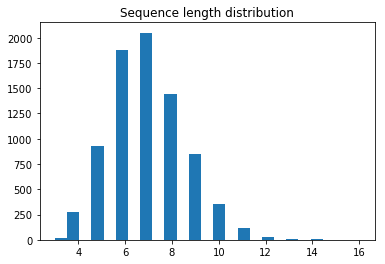

In [149]:
MAX_LENGTH = max(map(len, names))
print("max length:", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, names)), bins=25);

# Text processing

First we need to collect a "vocabulary" of all unique tokens i.e. unique characters. We can then encode inputs as a sequence of character ids.

In [150]:
tokens = []
tokens_tmp = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']### YOUR CODE HERE: all unique characters go here, padding included!
for letter in tokens_tmp:
    tokens.append(letter)
    tokens.append(letter.upper())
tokens.append(' ')
tokens.append('#')
tokens.append('-')
tokens.append('\'')
tokens = list(tokens)
n_tokens = len(tokens)
print ('n_tokens:', n_tokens)

assert 50 < n_tokens < 60

n_tokens: 56


### Cast everything from symbols into identifiers

Tensorflow string manipulation is a bit tricky, so we'll work around it. 
We'll feed our recurrent neural network with ids of characters from our dictionary.

To create such dictionary, let's assign `token_to_id`

In [151]:
tokens_tmp_2 = []
i = 0
for letter in tokens:
    tokens_tmp_2.append([letter, i])
    i += 1

token_to_id = dict(tokens_tmp_2) ### YOUR CODE HERE: create a dictionary of {symbol -> its  index in tokens}

assert len(tokens) == len(token_to_id), "dictionaries must have same size"

In [152]:
print(token_to_id)

{'a': 0, 'A': 1, 'b': 2, 'B': 3, 'c': 4, 'C': 5, 'd': 6, 'D': 7, 'e': 8, 'E': 9, 'f': 10, 'F': 11, 'g': 12, 'G': 13, 'h': 14, 'H': 15, 'i': 16, 'I': 17, 'j': 18, 'J': 19, 'k': 20, 'K': 21, 'l': 22, 'L': 23, 'm': 24, 'M': 25, 'n': 26, 'N': 27, 'o': 28, 'O': 29, 'p': 30, 'P': 31, 'q': 32, 'Q': 33, 'r': 34, 'R': 35, 's': 36, 'S': 37, 't': 38, 'T': 39, 'u': 40, 'U': 41, 'v': 42, 'V': 43, 'w': 44, 'W': 45, 'x': 46, 'X': 47, 'y': 48, 'Y': 49, 'z': 50, 'Z': 51, ' ': 52, '#': 53, '-': 54, "'": 55}


In [153]:
def to_matrix(names, max_len=None, pad=token_to_id[pad_token], dtype=np.int32):
    """Casts a list of names into rnn-digestable padded matrix"""
    
    max_len = max_len or max(map(len, names))
    names_ix = np.zeros([len(names), max_len], dtype) + pad

    for i in range(len(names)):
        try:
            name_ix = list(map(token_to_id.get, names[i]))
            names_ix[i, :len(name_ix)] = name_ix
        except:
            print(names[i])
            
    return names_ix

In [154]:
# Example: cast 4 random names to padded matrices (so that we can easily batch them)
print('\n'.join(names[::2000]))
print(to_matrix(names[::2000]))

 Abagael
 Glory
 Prissie
 Giovanne
[[52  1  2  0 12  0  8 22 53]
 [52 13 22 28 34 48 53 53 53]
 [52 31 34 16 36 36 16  8 53]
 [52 13 16 28 42  0 26 26  8]]


# Defining a recurrent neural network

We can rewrite recurrent neural network as a consecutive application of dense layer to input $x_t$ and previous rnn state $h_t$. This is exactly what we're gonna do now.
<img src="./rnn.png" width=600>

Since we're training a language model, there should also be:
* An embedding layer that converts character id x_t to a vector.
* An output layer that predicts probabilities of next phoneme based on h_t+1

In [169]:
# remember to reset your session if you change your graph!
s = keras_utils.reset_tf_session()

In [196]:
import keras
from keras.layers import concatenate, Dense, Embedding

rnn_num_units = 64  # size of hidden state
embedding_size = 16  # for characters

# Let's create layers for our recurrent network
# Note: we create layers but we don't "apply" them yet (this is a "functional API" of Keras)
# Note: set the correct activation (from keras.activations) to Dense layers!

# an embedding layer that converts character ids into embeddings
embed_x = Embedding(n_tokens, embedding_size)

# a dense layer that maps input and previous state to new hidden state, [x_t,h_t]->h_t+1
get_h_next = Dense(rnn_num_units)### YOUR CODE HERE

# a dense layer that maps current hidden state to probabilities of characters [h_t+1]->P(x_t+1|h_t+1)
get_probas = Dense(n_tokens, activation = 'softmax') ### YOUR CODE HERE 

We will generate names character by character starting with `start_token`:

<img src="./char-nn.png" width=600>

In [197]:
def rnn_one_step(x_t, h_t):
    """
    Recurrent neural network step that produces 
    probabilities for next token x_t+1 and next state h_t+1
    given current input x_t and previous state h_t.
    We'll call this method repeatedly to produce the whole sequence.
    
    You're supposed to "apply" above layers to produce new tensors.
    Follow inline instructions to complete the function.
    """
    # convert character id into embedding
    x_t_emb = embed_x(tf.reshape(x_t, [-1, 1]))[:, 0]
    
    print('x_t shape ', x_t.shape)
    print('h_t shape ', h_t.shape)
    try:
        print('x_t_emb shape ', x_t_emb.shape)
    except:
        pass
    # concatenate x_t embedding and previous h_t state
    x_and_h = concatenate([x_t_emb, h_t]) ### YOUR CODE HERE
    try:
        print('x_and_h shape ', x_and_h.shape)
    except:
        pass
    # compute next state given x_and_h
    h_next = get_h_next(x_and_h)### YOUR CODE HERE
    try:
        print('h_next.shape', h_next.shape)
    except:
        pass
    
    # get probabilities for language model P(x_next|h_next)
    output_probas = get_probas(h_next) ### YOUR CODE HERE
    
    return output_probas, h_next

# RNN: loop

Once `rnn_one_step` is ready, let's apply it in a loop over name characters to get predictions.

Let's assume that all names are at most length-16 for now, so we can simply iterate over them in a for loop.


In [198]:
input_sequence = tf.placeholder(tf.int32, (None, MAX_LENGTH))  # batch of token ids
batch_size = tf.shape(input_sequence)[0]

predicted_probas = []
h_prev = tf.zeros([batch_size, rnn_num_units])  # initial hidden state

for t in range(MAX_LENGTH):
    x_t = input_sequence[:, t]  # column t
    probas_next, h_next = rnn_one_step(x_t, h_prev)
    
    h_prev = h_next
    predicted_probas.append(probas_next)
    
# combine predicted_probas into [batch, time, n_tokens] tensor
predicted_probas = tf.transpose(tf.stack(predicted_probas), [1, 0, 2])

# next to last token prediction is not needed
predicted_probas = predicted_probas[:, :-1, :]

x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h

# RNN: loss and gradients

Let's gather a matrix of predictions for $P(x_{next}|h)$ and the corresponding correct answers.

We will flatten our matrices to shape [None, n_tokens] to make it easier.

Our network can then be trained by minimizing crossentropy between predicted probabilities and those answers.

In [199]:
# flatten predictions to [batch*time, n_tokens]
predictions_matrix = tf.reshape(predicted_probas, [-1, n_tokens])

# flatten answers (next tokens) and one-hot encode them
answers_matrix = tf.one_hot(tf.reshape(input_sequence[:, 1:], [-1]), n_tokens)

Usually it's a good idea to ignore gradients of loss for padding token predictions.

Because we don't care about further prediction after the pad_token is predicted for the first time, so it doesn't make sense to punish our network after the pad_token is predicted.

For simplicity you can ignore this comment, it's up to you.

In [200]:
# Define the loss as categorical cross-entropy (e.g. from keras.losses).
# Mind that predictions are probabilities and NOT logits!
# Remember to apply tf.reduce_mean to get a scalar loss!
# keras.losses.categorical_crossentropy(y_true, y_pred)

loss = tf.reduce_mean(keras.losses.categorical_crossentropy(answers_matrix, predictions_matrix)) ### YOUR CODE HERE

optimize = tf.train.AdamOptimizer().minimize(loss)

# RNN: training

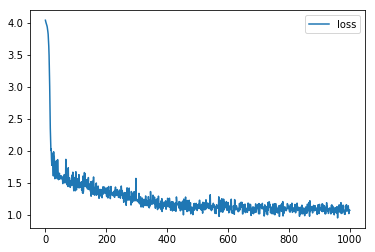

In [201]:
from IPython.display import clear_output
from random import sample

s.run(tf.global_variables_initializer())

batch_size = 32
history = []

for i in range(1000):
    #print("New cycle!")
    batch = to_matrix(sample(names, batch_size), max_len=MAX_LENGTH)
    #print("Batch is done", i)
    loss_i, _ = s.run([loss, optimize], {input_sequence: batch})
    
    history.append(loss_i)
    
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history, label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge"

# RNN: sampling
Once we've trained our network a bit, let's get to actually generating stuff. All we need is the `rnn_one_step` function you have written above.

In [202]:
x_t = tf.placeholder(tf.int32, (1,))
h_t = tf.Variable(np.zeros([1, rnn_num_units], np.float32))  # we will update hidden state in this variable

# For sampling we need to define `rnn_one_step` tensors only once in our graph.
# We reuse all parameters thanks to functional API usage.
# Then we can feed appropriate tensor values using feed_dict in a loop.
# Note how different it is from training stage, where we had to unroll the whole sequence for backprop.
next_probs, next_h = rnn_one_step(x_t, h_t)

x_t shape  (1,)
h_t shape  (1, 64)
x_t_emb shape  (1, 16)
x_and_h shape  (1, 80)
h_next.shape (1, 64)


In [203]:
def generate_sample(seed_phrase=start_token, max_length=MAX_LENGTH):
    '''
    This function generates text given a `seed_phrase` as a seed.
    Remember to include start_token in seed phrase!
    Parameter `max_length` is used to set the number of characters in prediction.
    '''
    x_sequence = [token_to_id[token] for token in seed_phrase]
    s.run(tf.assign(h_t, h_t.initial_value))
    
    # feed the seed phrase, if any
    for ix in x_sequence[:-1]:
         s.run(tf.assign(h_t, next_h), {x_t: [ix]})
    
    # start generating
    for _ in range(max_length-len(seed_phrase)):
        x_probs,_ = s.run([next_probs, tf.assign(h_t, next_h)], {x_t: [x_sequence[-1]]})
        x_sequence.append(np.random.choice(n_tokens, p=x_probs[0]))
        
    return ''.join([tokens[ix] for ix in x_sequence if tokens[ix] != pad_token])

In [212]:
# without prefix
for _ in range(10):
    print(generate_sample())

 Fhtarit
 Creldo
 Bunirona
 Klinna
 Dione
 Venyonn
 Lazyk
 Nreca
 Elandeg
 Crigco


In [211]:
# with prefix conditioning
for _ in range(10):
    print(generate_sample(' Farukh'))

 Farukha
 Farukhr
 Farukha
 Farukh
 Farukha
 Farukhherm
 Farukhei
 Farukhy
 Farukheldk
 Farukhaan


# Submit to Coursera

In [207]:
# token expires every 30 min
COURSERA_TOKEN = "dWPTbfYoTuFO0SwN"
COURSERA_EMAIL = "alimbualimbu@gmail.com"

In [208]:
from submit import submit_char_rnn
samples = [generate_sample(' Al') for i in tqdm_utils.tqdm_notebook_failsafe(range(25))]
submission = (history, samples)
submit_char_rnn(submission, COURSERA_EMAIL, COURSERA_TOKEN)



Submitted to Coursera platform. See results on assignment page!


# Try it out!

__Disclaimer:__ This part of assignment is entirely optional. You won't receive bonus points for it. However, it's a fun thing to do. Please share your results on course forums.

You've just implemented a recurrent language model that can be tasked with generating any kind of sequence, so there's plenty of data you can try it on:

* Novels/poems/songs of your favorite author
* News titles/clickbait titles
* Source code of Linux or Tensorflow
* Molecules in [smiles](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) format
* Melody in notes/chords format
* IKEA catalog titles
* Pokemon names
* Cards from Magic, the Gathering / Hearthstone

If you're willing to give it a try, here's what you wanna look at:
* Current data format is a sequence of lines, so a novel can be formatted as a list of sentences. Alternatively, you can change data preprocessing altogether.
* While some datasets are readily available, others can only be scraped from the web. Try `Selenium` or `Scrapy` for that.
* Make sure MAX_LENGTH is adjusted for longer datasets. There's also a bonus section about dynamic RNNs at the bottom.
* More complex tasks require larger RNN architecture, try more neurons or several layers. It would also require more training iterations.
* Long-term dependencies in music, novels or molecules are better handled with LSTM or GRU

__Good hunting!__

# Bonus level: dynamic RNNs

Apart from Keras, there's also a friendly TensorFlow API for recurrent neural nets. It's based around the symbolic loop function (aka [tf.scan](https://www.tensorflow.org/api_docs/python/tf/scan)).

RNN loop that we implemented for training can be replaced with single TensorFlow instruction: [tf.nn.dynamic_rnn](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn).
This interface allows for dynamic sequence length and comes with some pre-implemented architectures.

Take a look at [tf.nn.rnn_cell.BasicRNNCell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicRNNCell).

In [213]:
class CustomRNN(tf.nn.rnn_cell.BasicRNNCell):
    def call(self, input, state):
        # from docs:
        # Returns:
        # Output: A 2-D tensor with shape [batch_size, self.output_size].
        # New state: Either a single 2-D tensor, or a tuple of tensors matching the arity and shapes of state.
        return rnn_one_step(input[:, 0], state)
    
    @property
    def output_size(self):
        return n_tokens
    
cell = CustomRNN(rnn_num_units)

input_sequence = tf.placeholder(tf.int32, (None, None))
    
predicted_probas, last_state = tf.nn.dynamic_rnn(cell, input_sequence[:, :, None], dtype=tf.float32)

print('LSTM outputs for each step [batch,time,n_tokens]:')
print(predicted_probas.eval({input_sequence: to_matrix(names[:10], max_len=50)}).shape)

x_t shape  (?,)
h_t shape  (?, 64)
x_t_emb shape  (?, 16)
x_and_h shape  (?, 80)
h_next.shape (?, 64)
LSTM outputs for each step [batch,time,n_tokens]:
(10, 50, 56)


Note that we never used MAX_LENGTH in the code above: TF will iterate over however many time-steps you gave it.

You can also use any pre-implemented RNN cell:

In [214]:
for obj in dir(tf.nn.rnn_cell) + dir(tf.contrib.rnn):
    if obj.endswith('Cell'):
        print(obj, end="\t")

BasicLSTMCell	BasicRNNCell	GRUCell	LSTMCell	MultiRNNCell	RNNCell	BasicLSTMCell	BasicRNNCell	BidirectionalGridLSTMCell	CoupledInputForgetGateLSTMCell	FusedRNNCell	GLSTMCell	GRUBlockCell	GRUCell	GridLSTMCell	IntersectionRNNCell	LSTMBlockCell	LSTMBlockFusedCell	LSTMCell	LayerNormBasicLSTMCell	MultiRNNCell	NASCell	PhasedLSTMCell	RNNCell	TimeFreqLSTMCell	UGRNNCell	

In [215]:
input_sequence = tf.placeholder(tf.int32, (None, None))

inputs_embedded = embed_x(input_sequence)

# standard cell returns hidden state as output!
cell = tf.nn.rnn_cell.LSTMCell(rnn_num_units)

state_sequence, last_state = tf.nn.dynamic_rnn(cell, inputs_embedded, dtype=tf.float32)

s.run(tf.global_variables_initializer())

print('LSTM hidden state for each step [batch,time,rnn_num_units]:')
print(state_sequence.eval({input_sequence: to_matrix(names[:10], max_len=50)}).shape)

LSTM hidden state for each step [batch,time,rnn_num_units]:
(10, 50, 64)
